In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./results/mdi_local.two_subgroups_linear_sims/version1.0/varying_heritability_n/seed331/results.csv")

In [3]:
pd.set_option('display.max_columns', None)
df.head(20)

,rep,n,n_name,heritability,heritability_name,n_estimators,min_samples_leaf,max_features,include_raw,model,fi,splitting_strategy,MSE_before_ablation,MSE_after_ablation,MSE_diff,time,split_seed,index,var,true_support,cor_with_signal
0,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,train-test,4872.015236,4642.410986,-229.604249,0.582260,331,0,0,1.0,NaN
1,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,train-test,4872.015236,4642.410986,-229.604249,0.582260,331,0,1,1.0,NaN
2,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,train-test,4872.015236,4642.410986,-229.604249,0.582260,331,0,2,1.0,NaN
3,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,train-test,4872.015236,4642.410986,-229.604249,0.582260,331,0,3,1.0,NaN
4,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,train-test,4872.015236,4642.410986,-229.604249,0.582260,331,0,4,1.0,NaN
5,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,train-test,4872.015236,4642.410986,-229.604249,0.582260,331,0,5,0.0,0.989974
6,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,train-test,4872.015236,4642.410986,-229.604249,0.582260,331,0,6,0.0,0.990857
7,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,train-test,4872.015236,4642.410986,-229.604249,0.582260,331,0,7,0.0,0.989652
8,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,train-test,4872.015236,4642.410986,-229.604249,0.582260,331,0,8,0.0,0.988853
9,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,train-test,4872.015236,4642.410986,-229.604249,0.582260,331,0,9,0.0,0.990042


In [9]:
# methods = ["MDI_all_stumps", "MDI_sub_stumps", "MDI_all_stumps_without_raw", "MDI_sub_stumps_without_raw", "LFI_sum_absolute_all_stumps",
#            "LFI_absolute_sum_all_stumps", "LFI_sum_absolute_sub_stumps", "LFI_absolute_sum_sub_stumps", 
#            "LFI_sum_absolute_all_stumps_without_raw", "LFI_absolute_sum_all_stumps_without_raw",
#            "LFI_sum_absolute_sub_stumps_without_raw", "LFI_absolute_sum_sub_stumps_without_raw", "TreeSHAP", "LIME"]

methods = ["MDI_all_stumps", "MDI_all_stumps_without_raw", "LFI_sum_absolute", "LFI_absolute_sum", "LFI_sum_absolute_without_raw", "LFI_absolute_sum_without_raw",
           "TreeSHAP", "LIME"]
sample_row_n = df["n"].unique().tolist()
sample_row_n.sort()
heritability = df["heritability"].unique().tolist()
heritability.sort()
nreps = df["rep"].max()
results = {}
for r in range(nreps+1):
    results[r] = {}
    for h in heritability:
        results[r][h] = {}
        for m in methods:
            results[r][h][m] = {}
            results[r][h][m]["MSE_diff"] = []

In [10]:
for r in range(nreps+1):
    for h in heritability:
        for m in methods:
            for s in sample_row_n:
                df_sub = df[(df["fi"] == m) & (df["n"] == s) & (df["heritability"] == h) & (df["rep"] == r)]
                assert len(df_sub["MSE_diff"].unique()) == 1
                results[r][h][m]["MSE_diff"].append(df_sub["MSE_diff"].unique()[0])

In [11]:
agg_results = {} 
for h in heritability:
    agg_results[h] = {}
    for m in methods:
        agg_results[h][m] = {}
        agg_results[h][m]["MSE_diff"] = []

In [12]:
for h in heritability:
    for m in methods:
        for s in sample_row_n:
            MSE_diff = 0
            for r in range(nreps+1):
                df_sub = df[(df["fi"] == m) & (df["n"] == s) & (df["heritability"] == h) & (df["rep"] == r)]
                assert len(df_sub["MSE_diff"].unique()) == 1
                MSE_diff += df_sub["MSE_diff"].unique()[0]
            MSE_diff /= (nreps+1)
            agg_results[h][m]["MSE_diff"].append(MSE_diff)

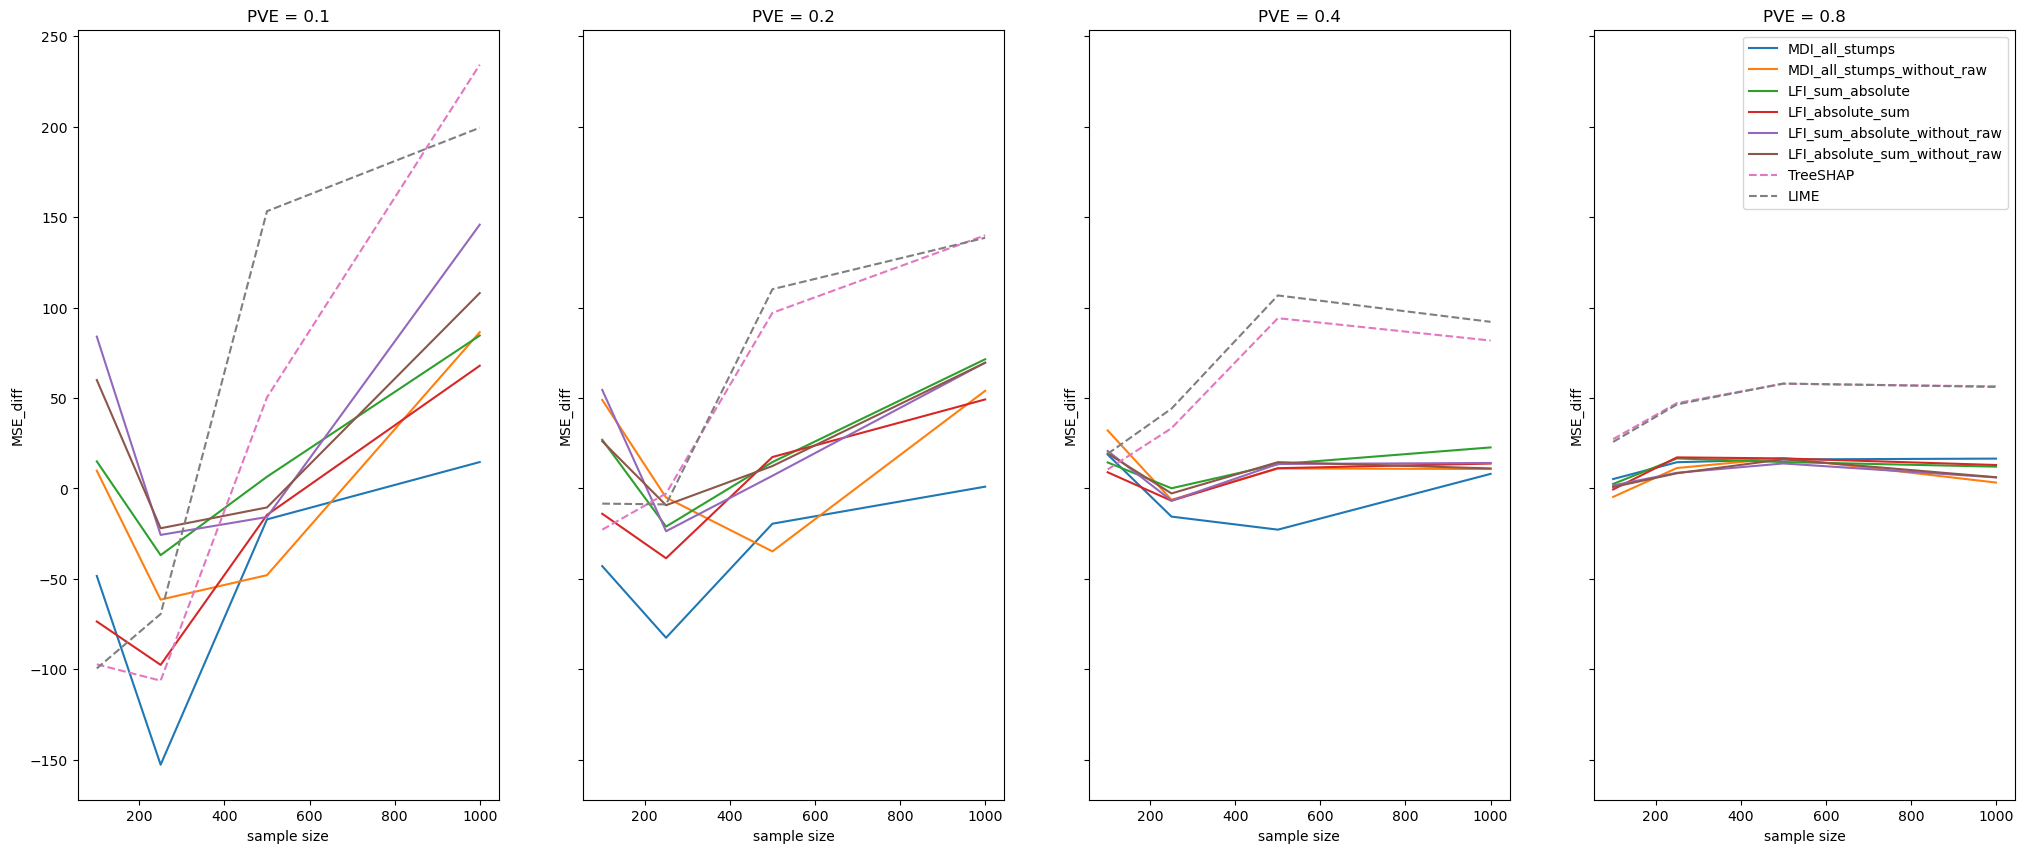

In [13]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(25, 10), sharey=True)


for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        if m in ["TreeSHAP", "LIME"]:
            axs[i].plot(sample_row_n, agg_results[h][m]["MSE_diff"], label=m, linestyle='dashed')
        else:
            axs[i].plot(sample_row_n, agg_results[h][m]["MSE_diff"], label=m)
    axs[i].set_xlabel('sample size')
    axs[i].set_ylabel('MSE_diff')
    axs[i].set_title('PVE = ' + str(h))
    
# Share the label in the last plot
axs[3].legend()

# Show the plots
plt.show()